<a href="https://colab.research.google.com/github/JulioCezar1111/Projeto28/blob/main/Machine_Learning03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Baixar dataset**

In [3]:
!wget https://raw.githubusercontent.com/lucaslattari/MachineLearningSeries/master/Ep%204/svbr.csv

--2022-06-18 17:57:46--  https://raw.githubusercontent.com/lucaslattari/MachineLearningSeries/master/Ep%204/svbr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543 (1.5K) [text/plain]
Saving to: ‘svbr.csv’

svbr.csv            100%[===================>]   1.51K  --.-KB/s    in 0s      

2022-06-18 17:57:46 (18.3 MB/s) - ‘svbr.csv’ saved [1543/1543]



# **Importar bibliotecas**

In [1]:
import numpy as np
import pandas as pd

# **Metodos**

In [2]:
def loadDataSet(filename):
    print("Carregando a base de dados...")
    baseDeDados = pd.read_csv(filename, delimiter=';')
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values
    print("ok!")
    return X, y

def fillMissingData(X):
    print("Preenchendo dados que estão faltando...")
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,1:] = imputer.fit_transform(X[:,1:])
    print("ok!")
    return X

def computeCategorization(X):
    print("Computando rotulação...")
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

    D = pd.get_dummies(X[:,0])
    X = X[:,1:]
    X = np.insert(X, 0, D.values, axis=1)
    print("ok!")
    return X

def splitTrainTestSets(X, y, testSize):
    print("Separando conjuntos de teste e treino...")
    from sklearn.model_selection import train_test_split
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)
    print("ok!")
    return XTrain, XTest, yTrain, yTest

def computeNormalization(XTrain, XTest):
    print("Computando Normalização...")
    from sklearn.preprocessing import StandardScaler
    scaleX = StandardScaler()
    XTrain = scaleX.fit_transform(XTrain)
    XTest = scaleX.fit_transform(XTest)
    print("ok!")
    return XTrain, XTest

def computeLinearRegression(XTrain, yTrain, XTest, yTest):
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression

    print("Computando Regressão Linear...")
    regressor = LinearRegression()
    regressor.fit(XTrain, yTrain)
    yPred = regressor.predict(XTest)
    print("ok!")

    print(XTest[:,-1])

    plt.scatter(XTest[:,-1], yTest, color = 'red')
    plt.plot(XTest[:,-1], regressor.predict(XTest), color='blue')
    plt.title("Inscritos x Visualizações")
    plt.xlabel("Inscritos")
    plt.ylabel("Visualizações")
    plt.show()

def runLinearRegressionExample():
    X, y = loadDataSet("svbr.csv")
    X = fillMissingData(X)
    X = computeCategorization(X)
    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.8)
    computeLinearRegression(XTrain, yTrain, XTest, yTest)

# **Chamar programa**

Carregando a base de dados...
ok!
Preenchendo dados que estão faltando...
ok!
Computando rotulação...
ok!
Separando conjuntos de teste e treino...
ok!
Computando Regressão Linear...
ok!
[1423056.0 7858.0 321068.0 65453.0 528761.0 78876.0 13661.0 274196.0
 9118.0 138132.0 31680.0 129466.0 18404.0 66122.0 6216.0 11188.0 13438.0
 72425.0 5299.0 35241.0 13148.0 45756.0 6421.0 135118.0 56006.0 64100.0
 17388.0 2308.0 137409.0 4357.0 49797.0 38494.0 53838.0 32788.0 42063.0
 2330.0 860493.0 374057.0]


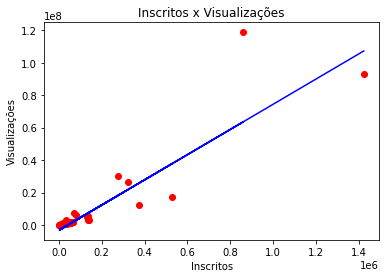

In [4]:
if __name__ == "__main__":
    runLinearRegressionExample()